In [ ]:
#Data Source John Hopkins Github Repository updated 3/10/20
#https://github.com/CSSEGISandData/COVID-19
#examining timelines per region 

In [ ]:
import pandas as pd 

In [2]:
data1 = pd.read_csv("time_jh_3_11.csv")

In [3]:
import matplotlib.pyplot as plt
import numpy as npimport 
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
from datetime import date, timedelta

In [25]:
data1.shape

(404, 53)

In [27]:
data1.head(40)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,106,...,990,990,990,990,990,990,990,990,990,NaN
Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,91,...,414,414,418,418,422,426,428,428,429,NaN
Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,132,...,576,576,576,576,576,576,576,576,576,NaN
Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,80,...,296,296,296,296,296,296,296,296,296,NaN
Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,19,...,91,91,91,102,119,120,124,124,125,0.0
Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,207,...,1350,1350,1350,1351,1352,1352,1352,1352,1353,NaN
Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,51,...,252,252,252,252,252,252,252,252,252,NaN
Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,9,...,146,146,146,146,146,146,146,146,146,NaN
Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,40,...,168,168,168,168,168,168,168,168,168,NaN


In [5]:
data1.set_index("Province/State", inplace=True)
data1.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,...,990,990,990,990,990,990,990,990,990,NaN
Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,...,414,414,418,418,422,426,428,428,429,NaN
Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,...,576,576,576,576,576,576,576,576,576,NaN
Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,...,296,296,296,296,296,296,296,296,296,NaN
Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,...,91,91,91,102,119,120,124,124,125,0.0


In [10]:
df2 = data1.loc[['Gansu'], '1/22/20':'3/10/20']
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Gansu,0,2,2,4,7,14,19,24,26,29,...,91,91,91,91,102,119,120,124,124,125
Gansu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df2.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.0,1.000000,1.000000,2.000000,3.500000,7.000000,9.500000,12.000000,13.000000,14.500000,...,45.500000,45.500000,45.500000,45.500000,51.000000,59.500000,60.000000,62.000000,62.000000,62.500000
std,0.0,1.414214,1.414214,2.828427,4.949747,9.899495,13.435029,16.970563,18.384776,20.506097,...,64.346717,64.346717,64.346717,64.346717,72.124892,84.145707,84.852814,87.681241,87.681241,88.388348
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.500000,0.500000,1.000000,1.750000,3.500000,4.750000,6.000000,6.500000,7.250000,...,22.750000,22.750000,22.750000,22.750000,25.500000,29.750000,30.000000,31.000000,31.000000,31.250000
50%,0.0,1.000000,1.000000,2.000000,3.500000,7.000000,9.500000,12.000000,13.000000,14.500000,...,45.500000,45.500000,45.500000,45.500000,51.000000,59.500000,60.000000,62.000000,62.000000,62.500000
75%,0.0,1.500000,1.500000,3.000000,5.250000,10.500000,14.250000,18.000000,19.500000,21.750000,...,68.250000,68.250000,68.250000,68.250000,76.500000,89.250000,90.000000,93.000000,93.000000,93.750000
max,0.0,2.000000,2.000000,4.000000,7.000000,14.000000,19.000000,24.000000,26.000000,29.000000,...,91.000000,91.000000,91.000000,91.000000,102.000000,119.000000,120.000000,124.000000,124.000000,125.000000


In [13]:
df_tr = df2.transpose()
print(df_tr)

Province/State  Gansu  Gansu
1/22/20             0      0
1/23/20             2      0
1/24/20             2      0
1/25/20             4      0
1/26/20             7      0
1/27/20            14      0
1/28/20            19      0
1/29/20            24      0
1/30/20            26      0
1/31/20            29      0
2/1/20             40      0
2/2/20             51      0
2/3/20             55      0
2/4/20             57      0
2/5/20             62      0
2/6/20             62      0
2/7/20             67      0
2/8/20             79      0
2/9/20             83      0
2/10/20            83      0
2/11/20            86      0
2/12/20            87      0
2/13/20            90      0
2/14/20            90      0
2/15/20            90      0
2/16/20            90      0
2/17/20            91      0
2/18/20            91      0
2/19/20            91      0
2/20/20            91      0
2/21/20            91      0
2/22/20            91      0
2/23/20            91      0
2/24/20       

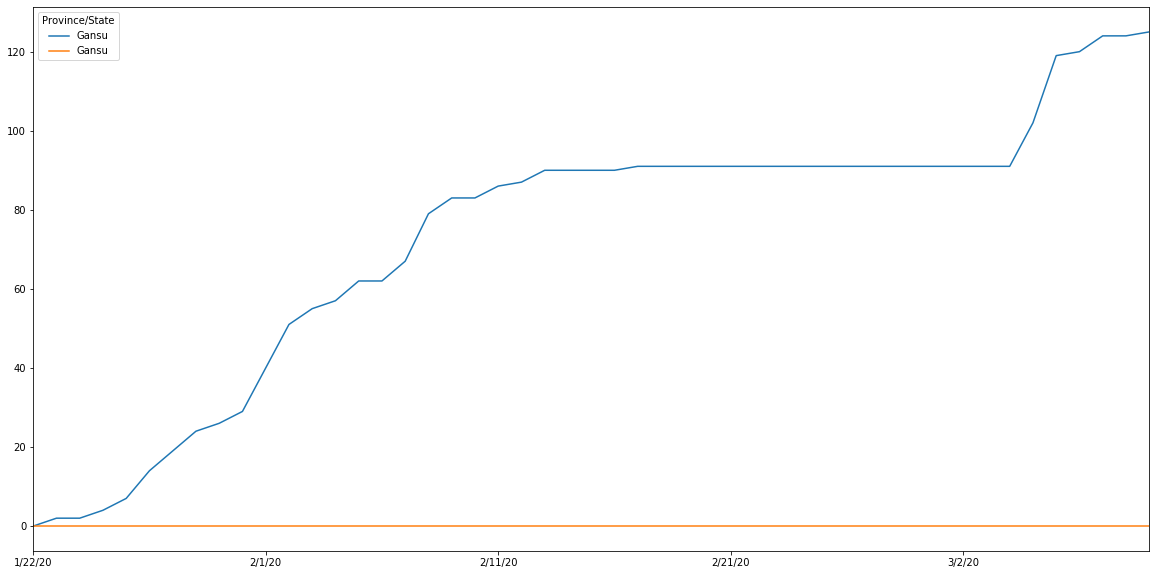

In [19]:
df_tr.plot(figsize=(20,10))

In [28]:
df4 = data1.loc[['Hubei'], '1/22/20':'3/10/20']
df4

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Hubei,444,444,549,761,1058,1423,3554,3554,4903,5806,...,66907,67103,67217,67332,67466,67592,67666,67707,67743,67760
Hubei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_tr2 = df4.transpose()
print(df_tr2)

Province/State  Hubei  Hubei
1/22/20           444      0
1/23/20           444      0
1/24/20           549      0
1/25/20           761      0
1/26/20          1058      0
1/27/20          1423      0
1/28/20          3554      0
1/29/20          3554      0
1/30/20          4903      0
1/31/20          5806      0
2/1/20           7153      0
2/2/20          11177      0
2/3/20          13522      0
2/4/20          16678      0
2/5/20          19665      0
2/6/20          22112      0
2/7/20          24953      0
2/8/20          27100      0
2/9/20          29631      0
2/10/20         31728      0
2/11/20         33366      0
2/12/20         33366      0
2/13/20         48206      0
2/14/20         54406      0
2/15/20         56249      0
2/16/20         58182      0
2/17/20         59989      0
2/18/20         61682      0
2/19/20         62031      0
2/20/20         62442      0
2/21/20         62662      0
2/22/20         64084      0
2/23/20         64084      0
2/24/20       

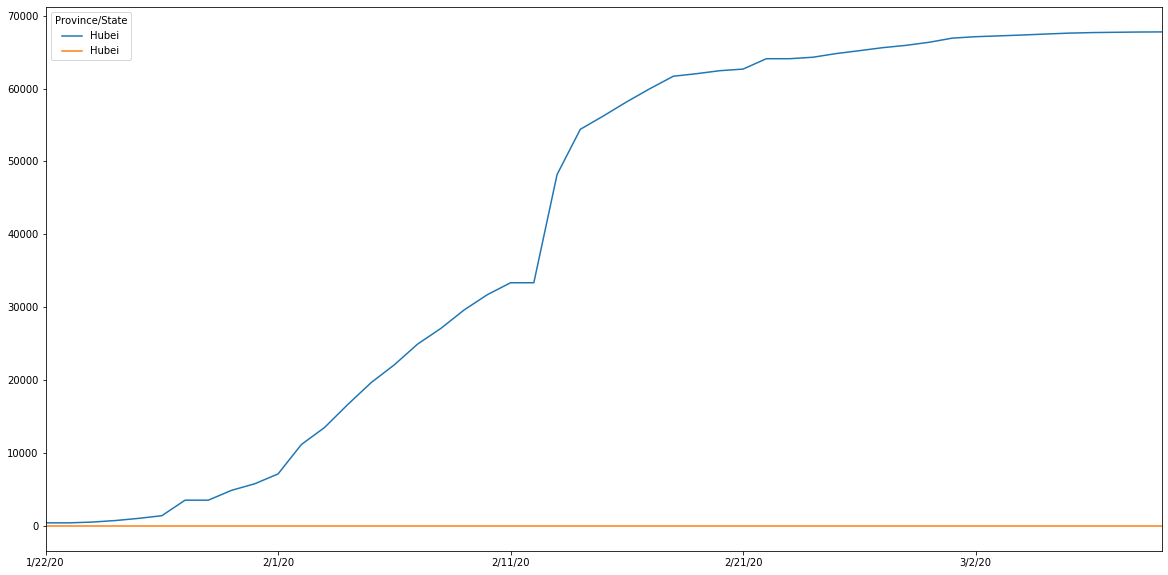

In [31]:
df_tr2.plot(figsize=(20,10))

In [35]:
df5 = data1.loc[["Hubei", "Sichuan"], '1/22/20':'3/10/20']
df5

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Hubei,444,444,549,761,1058,1423,3554,3554,4903,5806,...,66907,67103,67217,67332,67466,67592,67666,67707,67743,67760
Hubei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sichuan,5,8,15,28,44,69,90,108,142,177,...,538,538,538,538,539,539,539,539,539,539
Sichuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_tr3 = df5.transpose()
print(df_tr3)

Province/State  Hubei  Hubei  Sichuan  Sichuan
1/22/20           444      0        5        0
1/23/20           444      0        8        0
1/24/20           549      0       15        0
1/25/20           761      0       28        0
1/26/20          1058      0       44        0
1/27/20          1423      0       69        0
1/28/20          3554      0       90        0
1/29/20          3554      0      108        0
1/30/20          4903      0      142        0
1/31/20          5806      0      177        0
2/1/20           7153      0      207        0
2/2/20          11177      0      231        0
2/3/20          13522      0      254        0
2/4/20          16678      0      282        0
2/5/20          19665      0      301        0
2/6/20          22112      0      321        0
2/7/20          24953      0      344        0
2/8/20          27100      0      364        0
2/9/20          29631      0      386        0
2/10/20         31728      0      405        0
2/11/20      

In [39]:
df_tr3 = df_tr3.loc[:, (df_tr3 != 0).any(axis=0)]
df_tr3

Province/State,Hubei,Sichuan
1/22/20,444,5
1/23/20,444,8
1/24/20,549,15
1/25/20,761,28
1/26/20,1058,44
1/27/20,1423,69
1/28/20,3554,90
1/29/20,3554,108
1/30/20,4903,142
1/31/20,5806,177


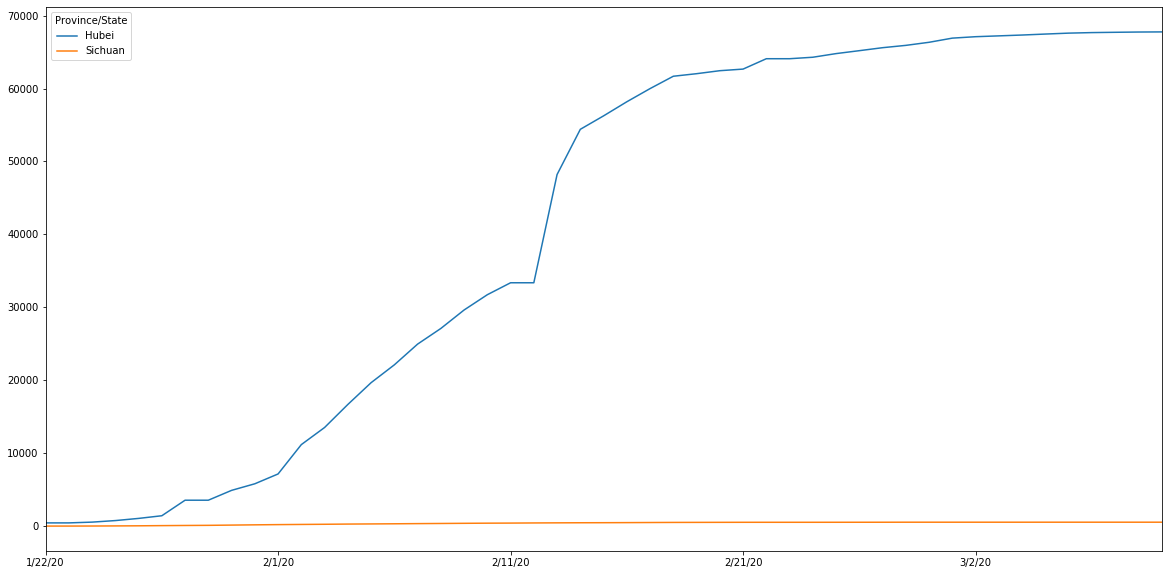

In [40]:
df_tr3.plot(figsize=(20,10))

In [41]:
df7 = data1.loc[["King County, WA", ""], '1/22/20':'3/10/20']
df7

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
Province/State,,,,,,,,,,,,,,,,,,,,,
"King County, WA",1,1,1,1,1,1,1,1,1,1,...,9,14,21,31,51,58,71,83,83,116
Sichuan,5,8,15,28,44,69,90,108,142,177,...,538,538,538,538,539,539,539,539,539,539
Sichuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_tr7 = df7.transpose()
print(df_tr7)

Province/State  King County, WA  Sichuan  Sichuan
1/22/20                       1        5        0
1/23/20                       1        8        0
1/24/20                       1       15        0
1/25/20                       1       28        0
1/26/20                       1       44        0
1/27/20                       1       69        0
1/28/20                       1       90        0
1/29/20                       1      108        0
1/30/20                       1      142        0
1/31/20                       1      177        0
2/1/20                        1      207        0
2/2/20                        1      231        0
2/3/20                        1      254        0
2/4/20                        1      282        0
2/5/20                        1      301        0
2/6/20                        1      321        0
2/7/20                        1      344        0
2/8/20                        1      364        0
2/9/20                        1      386        0


In [43]:
df_tr7 = df_tr7.loc[:, (df_tr7 != 0).any(axis=0)]
df_tr7

Province/State,"King County, WA",Sichuan
1/22/20,1,5
1/23/20,1,8
1/24/20,1,15
1/25/20,1,28
1/26/20,1,44
1/27/20,1,69
1/28/20,1,90
1/29/20,1,108
1/30/20,1,142
1/31/20,1,177


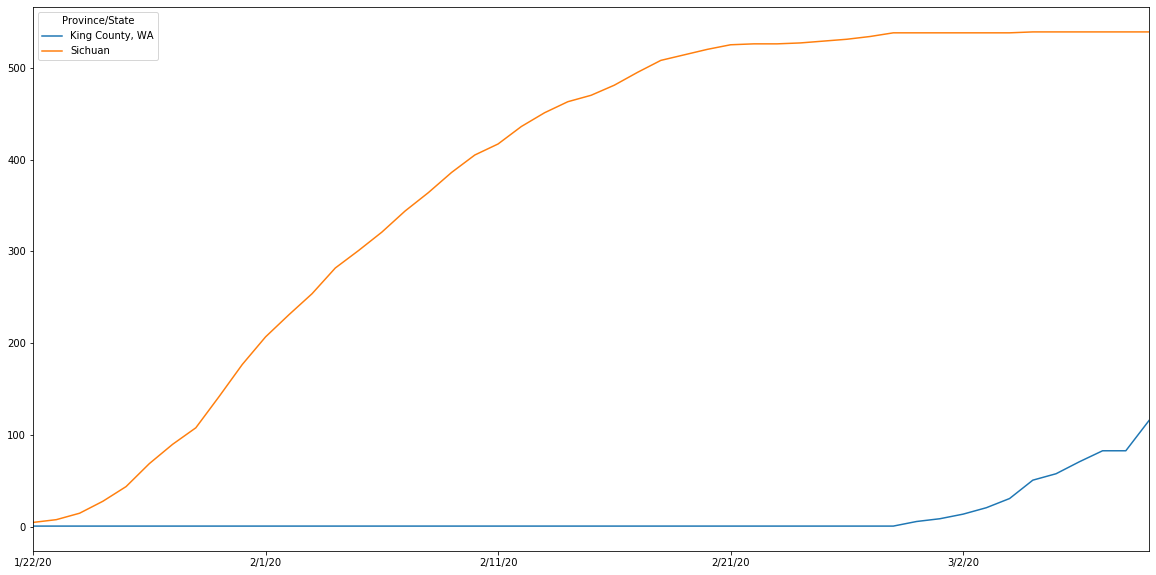

In [44]:
df_tr7.plot(figsize=(20,10))